<a href="https://colab.research.google.com/github/bbachonko/classification-models/blob/main/Loan-risk-predict-Grid-Search/Loan_Risk_Flag_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loan prediction



###Overall view of data

Firstly look a the dataset we have.

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
train_raw = pd.read_csv(r'Training Data.csv')
train = train_raw.copy()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


We see there is no nulls in data see if there are any non-unique valuse

In [ ]:
train.duplicated().value_counts()

False    252000
dtype: int64

Let's see how many duplicates are there in each column

In [ ]:
print('Column\t\tduplicated_percent\n')
for col in train:
  #percet_missing = train[col].duplicated / len(train[col])
  print(f'{col} : {train[col].duplicated().value_counts() / len(train[col])}\n')
  

Column		duplicated_percent

Id : False    1.0
Name: Id, dtype: float64

Income : True     0.833651
False    0.166349
Name: Income, dtype: float64

Age : True     0.999766
False    0.000234
Name: Age, dtype: float64

Experience : True     0.999917
False    0.000083
Name: Experience, dtype: float64

Married/Single : True     0.999992
False    0.000008
Name: Married/Single, dtype: float64

House_Ownership : True     0.999988
False    0.000012
Name: House_Ownership, dtype: float64

Car_Ownership : True     0.999992
False    0.000008
Name: Car_Ownership, dtype: float64

Profession : True     0.999798
False    0.000202
Name: Profession, dtype: float64

CITY : True     0.998742
False    0.001258
Name: CITY, dtype: float64

STATE : True     0.999885
False    0.000115
Name: STATE, dtype: float64

CURRENT_JOB_YRS : True     0.99994
False    0.00006
Name: CURRENT_JOB_YRS, dtype: float64

CURRENT_HOUSE_YRS : True     0.99998
False    0.00002
Name: CURRENT_HOUSE_YRS, dtype: float64

Risk_Flag : Tru

We see there is ~17% of non-uniqe vlaues on income columns, however it is possible, so leave it.

We will leave it as it is this amount of duplicates is reasonable cause these features simply can have the same values(sometimes).

Dropping *Id* column cause its unnecessary.

In [ ]:
train.drop(columns='Id', inplace=True)

Splitting dataset in two subsets with categorical and numeric data types

Now lets analyze the numeric column in terms of distribtion, variance etc.

###Numeric columns analyze

In [ ]:
train_numeric = train.select_dtypes(include='number')
train_numeric.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,3,13,0
1,7574516,40,10,9,13,0
2,3991815,66,4,4,10,0
3,6256451,41,2,2,12,1
4,5768871,47,11,3,14,1


In [ ]:
train_numeric.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


See how the data is distrubuted.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6d0210610>,
      dtype=object)

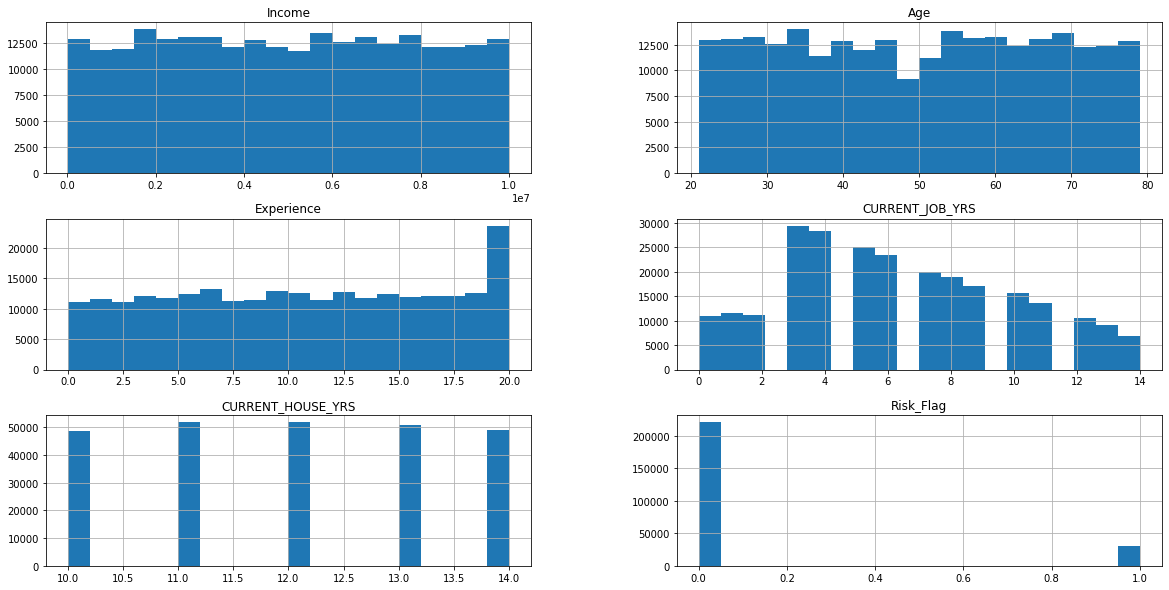

In [ ]:
train_numeric.hist(figsize=(20,10), bins=20)

Most of fetaures have linear distribution
We will have standarize some of these columns.

Look at the covariance matrix.



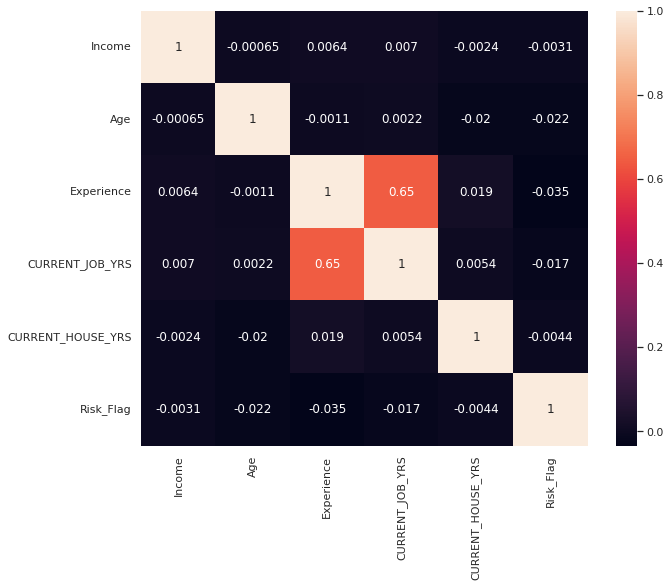

In [ ]:
import seaborn as sns


sns.set(rc = {'figure.figsize':(10,8)})

corrMatrix = train_numeric.corr()
sns.heatmap(corrMatrix, annot=True)


We have no any strong positive or neegative correlation between target column. Correlation is more likely ro be negative than positive.

In [ ]:
train_numeric.var()

Income               8.284674e+12
Age                  2.911751e+02
Experience           3.603108e+01
CURRENT_JOB_YRS      1.330100e+01
CURRENT_HOUSE_YRS    1.957304e+00
Risk_Flag            1.078714e-01
dtype: float64

The variance for *Income* stands out a lot in comparison to other columns.

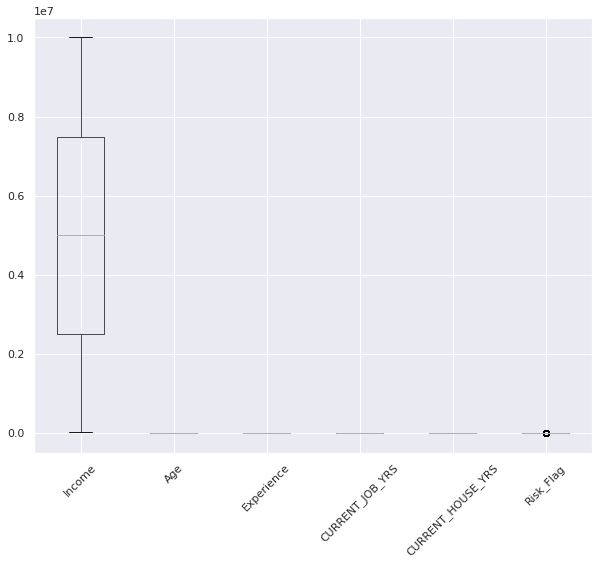

In [ ]:
train_numeric.boxplot(rot=45)

We need to normalize the data because the diffreences in valuse are too big

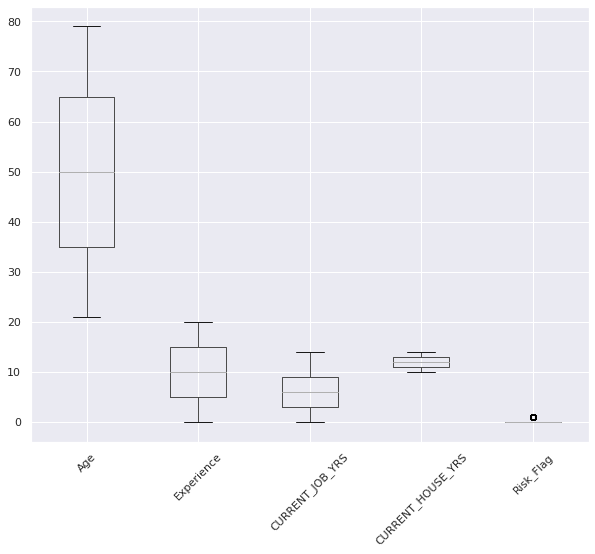

In [ ]:
train_numeric.drop(columns='Income', axis=1).boxplot(rot=45)

Ther rest of columns tends to have a wide variety of variance either. 

Now let's look at categoric columns



###Categoric columns analyze

In [ ]:
train_categoric = train.select_dtypes(exclude='number')
train_categoric.head()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh
1,single,rented,no,Software_Developer,Parbhani,Maharashtra
2,married,rented,no,Technical_writer,Alappuzha,Kerala
3,single,rented,yes,Software_Developer,Bhubaneswar,Odisha
4,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu


AxesSubplot(0.125,0.125;0.775x0.755)


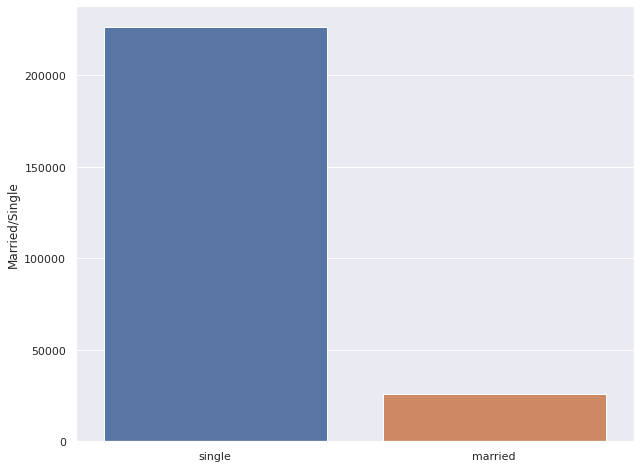

In [ ]:
print(sns.barplot(x=train_categoric['Married/Single'].value_counts().index, y=train_categoric['Married/Single'].value_counts()))


AxesSubplot(0.125,0.125;0.775x0.755)


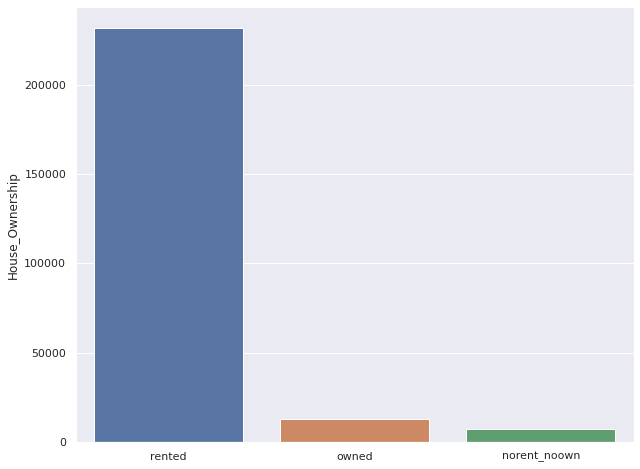

In [ ]:
print(sns.barplot(x=train_categoric['House_Ownership'].value_counts().index, y=train_categoric['House_Ownership'].value_counts()))



AxesSubplot(0.125,0.125;0.775x0.755)


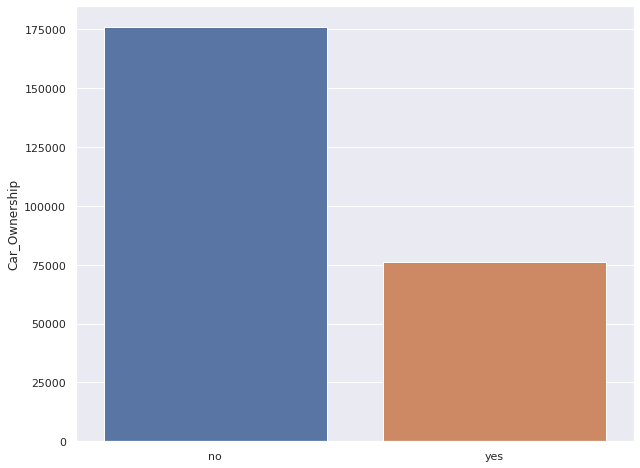

In [ ]:
print(sns.barplot(x=train_categoric['Car_Ownership'].value_counts().index, y=train_categoric['Car_Ownership'].value_counts()))

AxesSubplot(0.125,0.125;0.775x0.755)


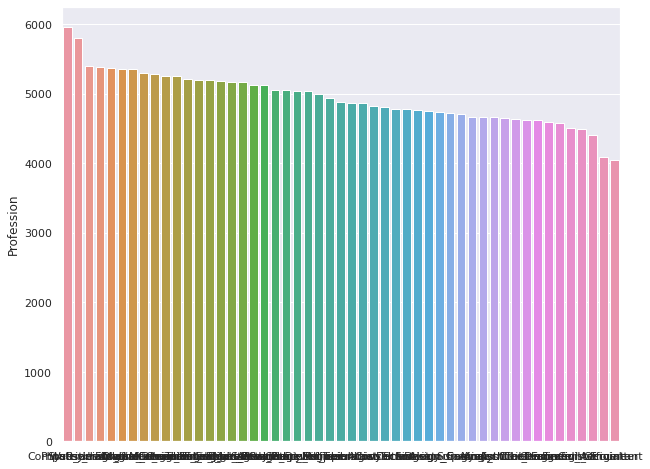

In [ ]:
import plotly.express as plt


print(sns.barplot(x=train_categoric['Profession'].value_counts().index, y=train_categoric['Profession'].value_counts()))



Now lets look once again data which are categoirc and why how the *Risk_Flag* depends on them.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


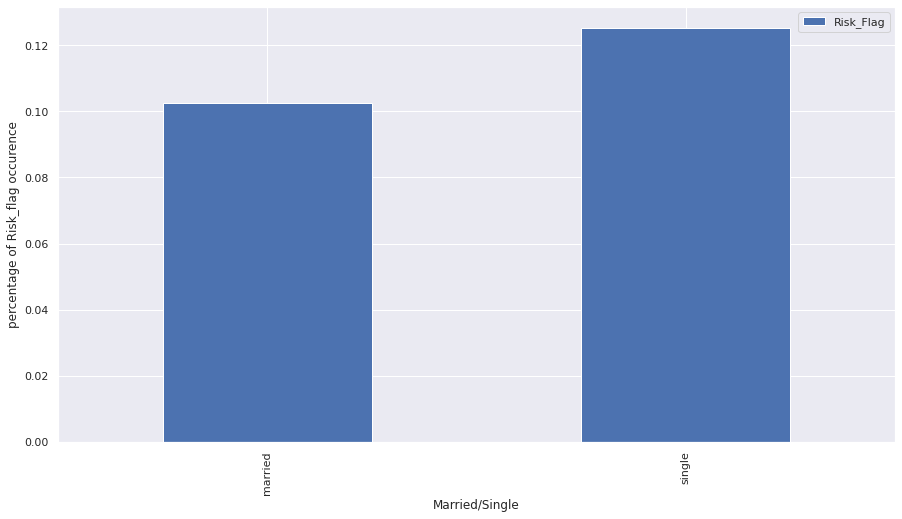

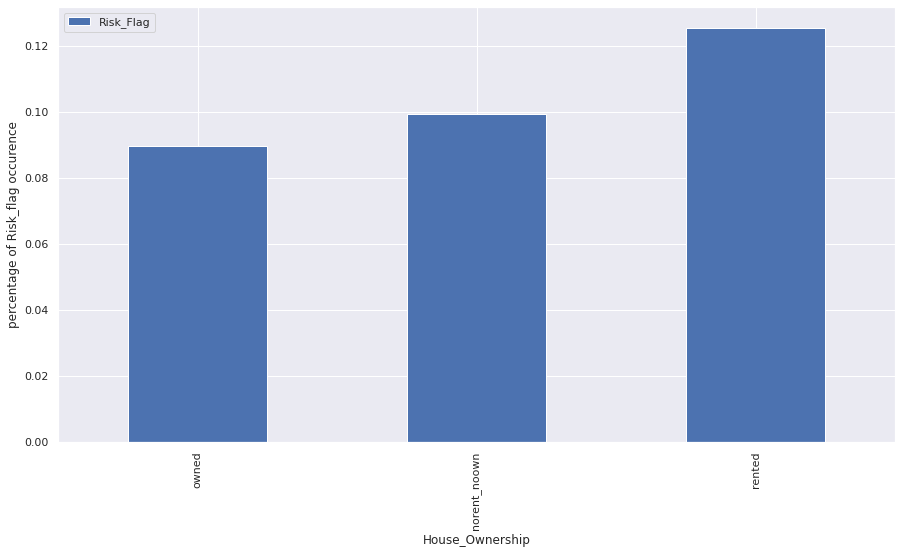

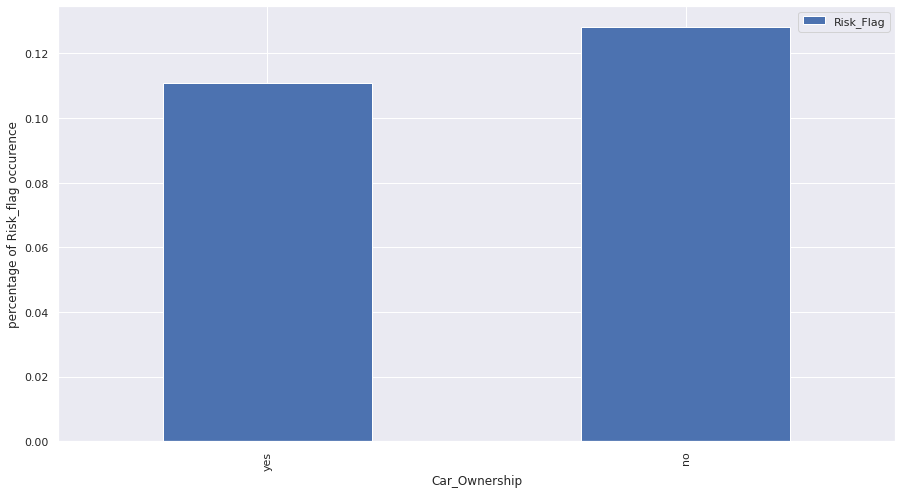

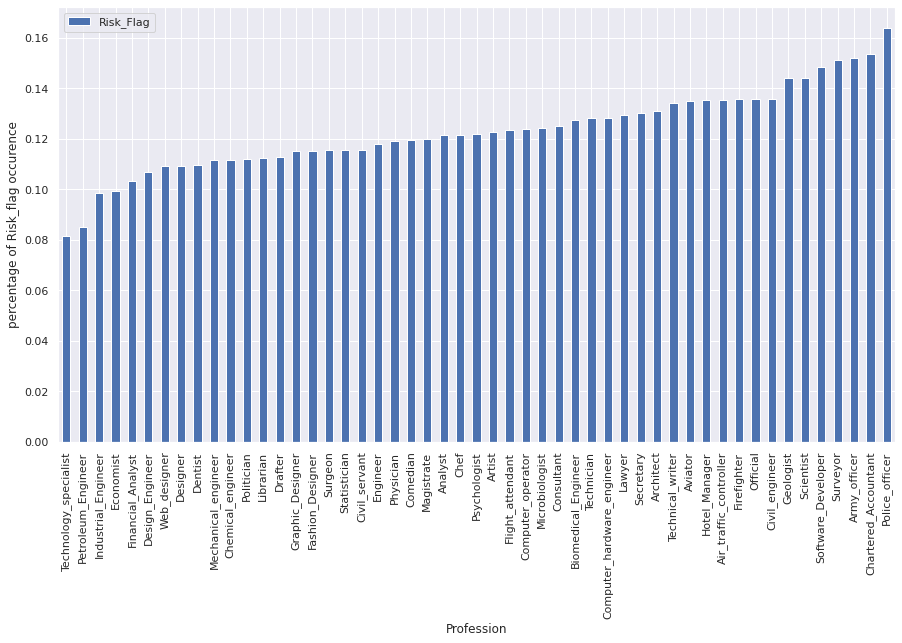

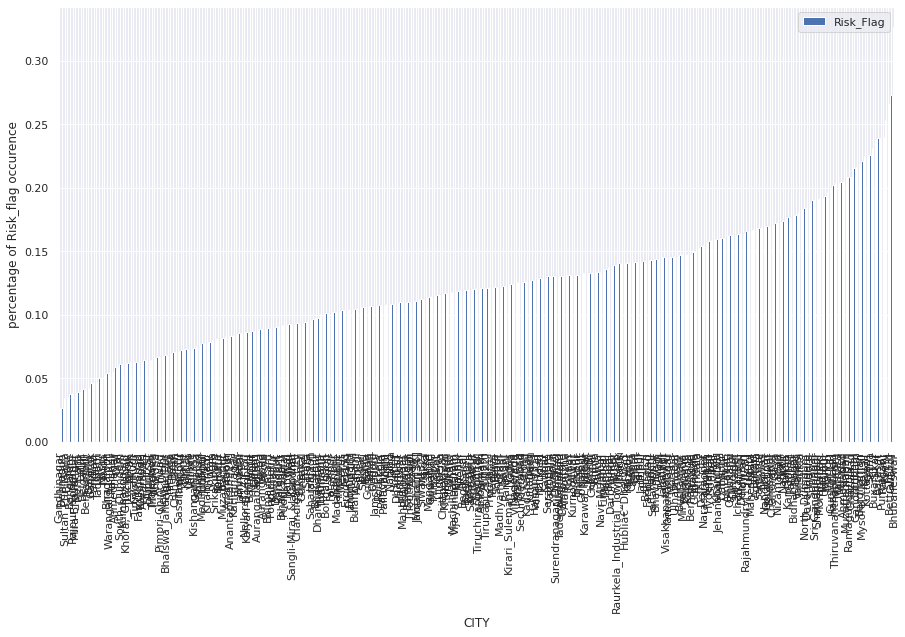

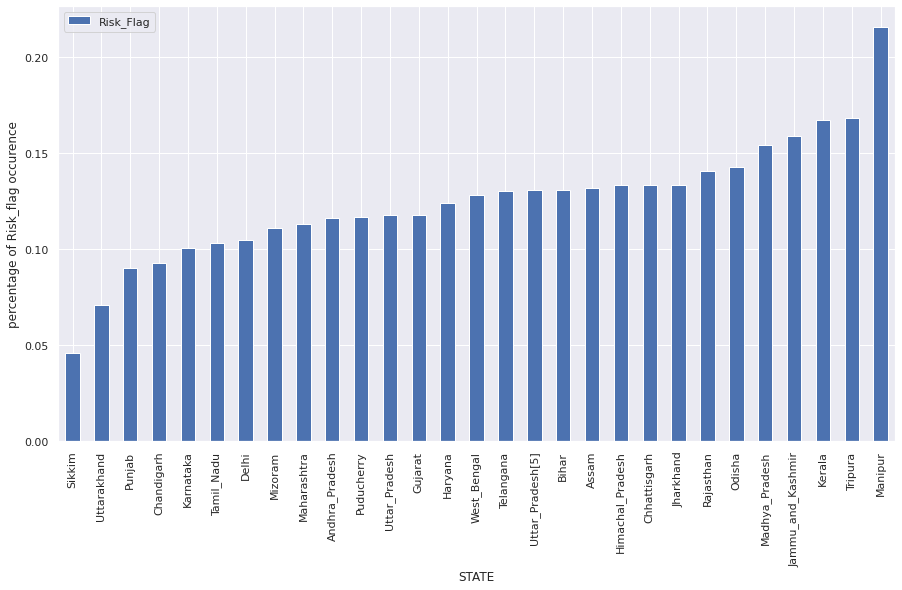

In [ ]:
categoric_with_target = pd.concat([train_categoric, train['Risk_Flag']], axis=1)

for col in categoric_with_target:
  if col != 'Risk_Flag':
    print(categoric_with_target.groupby(col)['Risk_Flag']
          .mean()
          .reset_index()
          .set_index(col)
          .sort_values('Risk_Flag', ascending=True)
          .plot(kind='bar', figsize=(15,8), ylabel='percentage of Risk_flag occurence')
          )
  else: 
    pass

Now, we clarly see how occuring the flag in target column is distributed among each categorical column. We use method mean instead of count to take into advantage amount of probes in each category. 
**We see for example there is 2 times more risk of red flag in *Profession* for *Police_oficcer* than for Technology_specialist**. But will it be useful after using *get_dummies* method?


In [ ]:
train.CITY.describe()

count            252000
unique              317
top       Vijayanagaram
freq               1259
Name: CITY, dtype: object

There is over 300 different values for CITY column. The column will be dropped. It will not give too much of information to model and make its fit time longer.

Getting rid off other categoric columns which have many unique values to make final shape smaller.

In [ ]:
train.drop(columns=['Profession', 'STATE', 'CITY'], axis=1, inplace=True)

In [ ]:
train

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,3,13,0
1,7574516,40,10,single,rented,no,9,13,0
2,3991815,66,4,married,rented,no,4,10,0
3,6256451,41,2,single,rented,yes,2,12,1
4,5768871,47,11,single,rented,no,3,14,1
...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,6,11,0
251996,2843572,26,10,single,rented,no,6,11,0
251997,4522448,46,7,single,rented,no,7,12,0
251998,6507128,45,0,single,rented,no,0,10,0


### Feature Preprocessing

As we have observed how the are distrubuted and correalted with target column we can now scale them and do encoding.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6bb43eb10>,
      dtype=object)

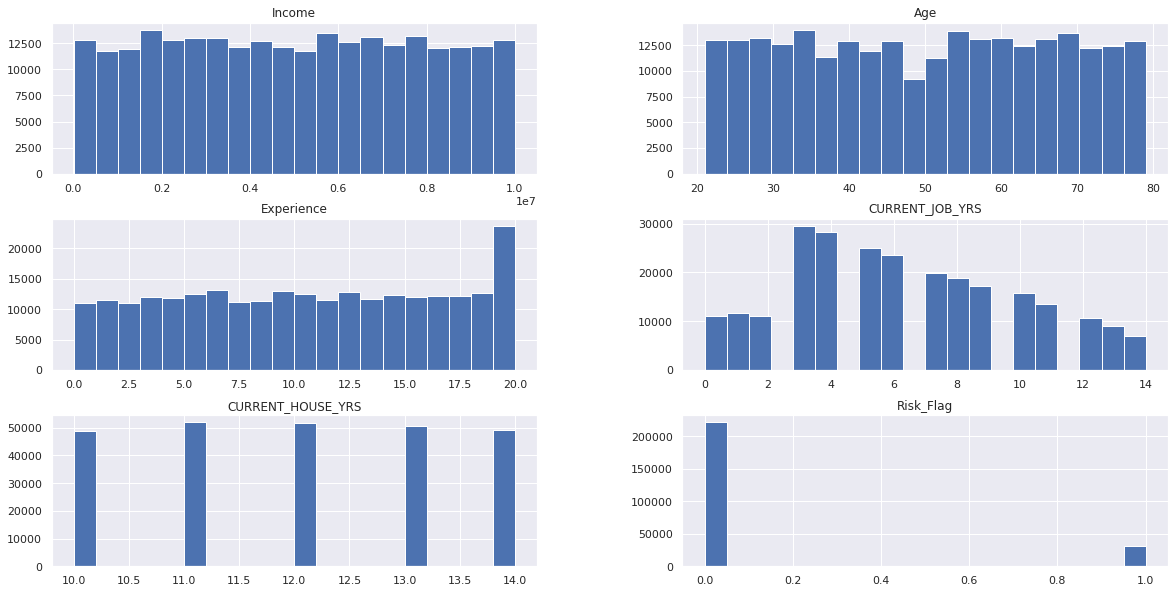

In [ ]:
train_numeric.hist(figsize=(20,10), bins=20)

Getting back to numeric columns and standardize them. Using logarithmic transform on non linear distributed numeric distributed columns and standard scaling on the gaussian like distributed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6b92d0bd0>,
      dtype=object)

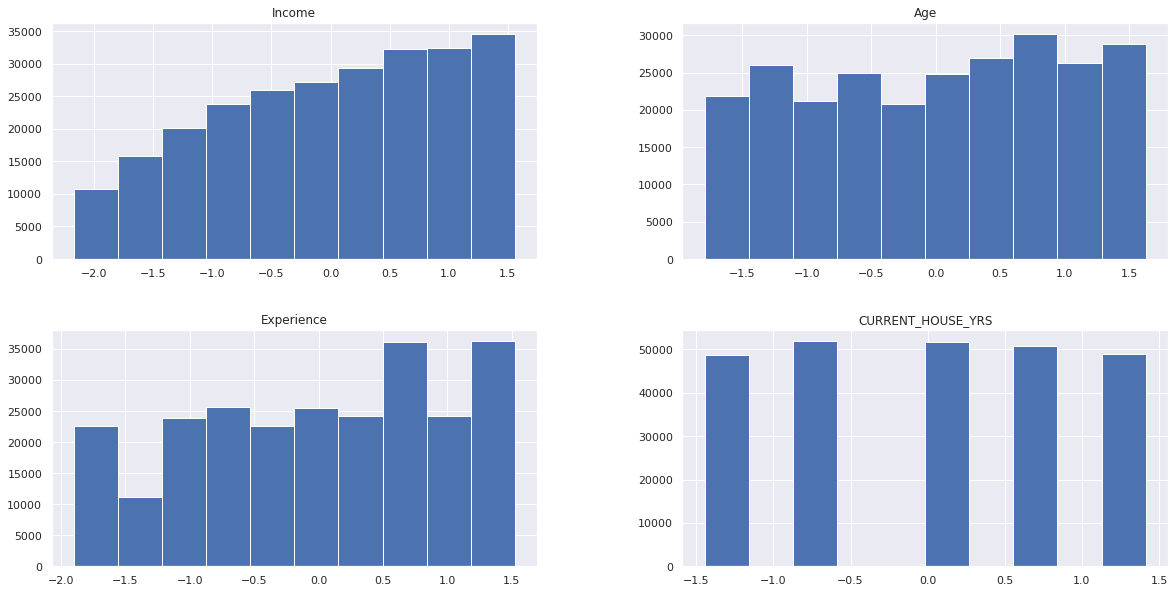

In [ ]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, LabelEncoder

non_linear_numeric_col = ['Income', 'Age', 'Experience', 'CURRENT_HOUSE_YRS']

power_transf = PowerTransformer()

#train[non_linear_numeric_col] = power_transf.fit_transform(train[non_linear_numeric_col])
train[non_linear_numeric_col] = pd.DataFrame(power_transf.fit_transform(train[non_linear_numeric_col]), 
                                             columns=non_linear_numeric_col)

train[non_linear_numeric_col].hist(figsize=(20,10))

Now, scaling the rest of numeric columns.

In [ ]:
linear_numeric_col = ['CURRENT_JOB_YRS']

scaler = StandardScaler()


train[linear_numeric_col] = pd.DataFrame(scaler.fit_transform(train[linear_numeric_col]), 
                                          columns=linear_numeric_col)

Now - categorical columns

In [ ]:
categoric_cols = ['Married/Single', 'House_Ownership', 'Car_Ownership']
train = pd.get_dummies(train, columns=categoric_cols, drop_first=True)

Checking the balance of target column values

In [ ]:
train.Risk_Flag.value_counts() / len(train.Risk_Flag)

0    0.877
1    0.123
Name: Risk_Flag, dtype: float64

We can see there is a minority class in target column which is '*1*'. To get a better metrics score wee need to balance according of both classes.

### Balancing target class

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
train_shortened = train.head(100_000)

train_majority = train_shortened[(train_shortened['Risk_Flag']==0)] 
train_minority = train_shortened[(train_shortened['Risk_Flag']==1)] 

# upsample minority class
train_minority_upsampled = resample(train_minority, 
                                    replace=True,    # sample with replacement
                                    n_samples= 70_000, # to match majority class
                                    )  # reproducible results
# Combine majority class with upsampled minority class
train_upsampled = pd.concat([train_minority_upsampled, train_majority])

train_sampled = train_upsampled.sample(frac=0.1)

In [ ]:
train_upsampled.Risk_Flag.value_counts() / len(train)

0    0.345250
1    0.277778
Name: Risk_Flag, dtype: float64

Now, wee see the occuring of minority class is way more balanced.

In [ ]:
print(train_sampled.Risk_Flag.value_counts())
train_sampled.Risk_Flag.value_counts() / len(train_sampled)


0    8805
1    6895
Name: Risk_Flag, dtype: int64


0    0.560828
1    0.439172
Name: Risk_Flag, dtype: float64

We have about 60-40 percent ratio of 0's and 1's in *Risk_Flag* column

In [ ]:
from sklearn.model_selection import train_test_split

y = train_sampled.pop('Risk_Flag')
x = train_sampled

X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11775, 9)
(3925, 9)
(11775,)
(3925,)


In [ ]:
print(y_test.value_counts() / len(y_test))
print(y_train.value_counts() / len(y_train))

0    0.560764
1    0.439236
Name: Risk_Flag, dtype: float64
0    0.560849
1    0.439151
Name: Risk_Flag, dtype: float64


###Defining classifiers

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.ensemble import BalancedBaggingClassifier

classifiers = [
               RandomForestClassifier(class_weight='balanced'),  
               KNeighborsClassifier(),
               #LogisticRegression(class_weight='balanced')
              ]

classifier_names =[]
for model in classifiers: classifier_names.append(type(model).__name__)

zipped_clf = zip(classifier_names, classifiers)


### Defining validation metrics

In [ ]:
def classifier_validator(classifier, x, y):
  scores = []

  for name, clf in classifier:
    score = cross_validate(clf, x, y, cv=5, scoring=('accuracy', 'f1', 'recall'))

    scores.append((name, 
                   score['test_accuracy'],
                   score['test_f1'],
                   score['test_recall']
                  ))

  return scores
    

def result_printer(validator_results, isGrid=False):

    for i in range(len(validator_results)):
      print('\nALGORITHM = ', validator_results[i][0], 
            '\naccuracy =', validator_results[i][1].mean(), 
            '\nf1_scores =', validator_results[i][2].mean(),
            '\nrecall scores =', validator_results[i][3].mean()
            )
      
    if isGrid == True:
      print('Best params: ', validator_results[i][4])


In [ ]:
result_train = classifier_validator(zipped_clf, X_train, y_train)


print('Train set results:')
result_printer(result_train)

Train set results:

ALGORITHM =  RandomForestClassifier 
accuracy = 0.9204246284501062 
f1_scores = 0.9129102083178381 
recall scores = 0.9493332959567926

ALGORITHM =  KNeighborsClassifier 
accuracy = 0.7479405520169851 
f1_scores = 0.7404519148965651 
recall scores = 0.8187953540960017


The scores are really good. The model is probably overfitted.

Trying it on yet unseen data. 

In [ ]:
test = train[101_000 : ]
frac = 0.0025
test_sampled = test.sample(frac=frac)

print(f'Training set size: {len(X_train)}')
print(f'Final set size = {frac*len(test)}')

X_test_final = test.drop(columns='Risk_Flag', axis=1)
y_test_final = test['Risk_Flag']

rfc = RandomForestClassifier(class_weight='balanced')

rfc.fit(X_train, y_train)

final_results = classifier_validator([('RandomForest', rfc)], X_test_final, y_test_final)

print('\nTest set scores')
result_printer(final_results)


Training set size: 11775
Final set size = 377.5

Test set scores

ALGORITHM =  RandomForest 
accuracy = 0.8500331125827815 
f1_scores = 0.44276064873276233 
recall scores = 0.6233862647031583


Wee see now the **f1_score is way worse** than in train set case however the accuracy rate in pretty good.
Trying with hyperparameters with using RandomizedSearch.

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params = {
          'n_estimators': [25, 50, 150, 250, 500],
          'max_features': [0.1, 0.25, 0.5, 0.75, 1.0],
          'min_samples_split': [2, 4, 6, 8],
          'criterion' : ['gini', 'entropy'],
          'max_features' : ['sqrt', 'log2', None]
         }


def GridSearch_validator(classifier, x, y, params):
  scores = []

  for name, clf in classifier:
      score = RandomizedSearchCV(clf, param_distributions=params, n_iter=3, cv=3, n_jobs=-1, scoring=('accuracy', 'f1'), verbose=True, refit='f1')
      score.fit(x, y)


  res = print('Best f1 score: ', score.best_score_, 
        '\nResults', score.cv_results_,
        '\nBest params', score.best_params_
        )
  
  return res
   
   

In [ ]:
grid_score = GridSearch_validator([('RandomForest', rfc)], X_test_final, y_test_final, params)
#result_printer(grid_score, isGrid=True)
grid_score

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best f1 score:  0.45780875250853864 
Results {'mean_fit_time': array([ 9.3617777 , 36.69568944,  8.71263838]), 'std_fit_time': array([1.22639698, 6.8398257 , 2.35619496]), 'mean_score_time': array([0.90268811, 2.713691  , 0.87591998]), 'std_score_time': array([0.08328027, 0.3220114 , 0.2012908 ]), 'param_n_estimators': masked_array(data=[50, 150, 50],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_split': masked_array(data=[8, 2, 4],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=['sqrt', 'sqrt', 'log2'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_criterion': masked_array(data=['gini', 'entropy', 'gini'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 50, 'mi

# Summarize

The results for f_1 scores seem to be a bit better. The accuracy metric is on a good level, however the *f_1 score* which is a crucial metrics for classification problems with imbalanced data is still not too high. To make it better:

*   We can try with more parameters for chosen classifier
*   Use Recursive Feature Elimination (RFE) to select more valuable in model teaching features.
*   Use more dataset to fit our classifier
*   Use other scaling methods on features
*   Use other label encoding method 

